<a href="https://colab.research.google.com/github/martaarozarena/KSchool-Master-Final-Project/blob/master/exog_varaibles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


In [165]:
sheets=["c1_schoolclosing","c2_workplaceclosing","c3_cancelpublicevents","c4_restrictionsongatherings","c5_closepublictransport","c6_stayathomerequirements","c7_domestictravel","c8_internationaltravel","h1_publicinfocampaign","h2_testingpolicy","h3_contacttracing"]
initialdate="01-01-2020"
#enddate="30-06-2020"

In [166]:
var = pd.read_excel("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx",sheet_name=sheets)

In [167]:
for i in var.keys():
  var[i]=var[i].drop("CountryCode",axis=1)
  var[i].index=var[i].CountryName
  var[i]=var[i].drop("CountryName",axis=1)
  var[i]=var[i][:-3]
  var[i]=var[i].T
  var[i]=var[i].loc[:,var[i].columns.str.contains('Denmark|Germany|Spain|Finland|Italy|Sweden|France|Norway|United Kingdom' \
                                                  '|United States|Canada|Mexico' \
                                                  '|Australia|Indonesia|Malaysia|Philippines|Thailand|Hong Kong|Vietnam|China|India|Japan|Singapore|Taiwan' \
                                                  '|Saudi Arabia|United Arab Emirates', regex=True)]
  var[i].index=pd.to_datetime(var[i].index,format="%d%b%Y")
#  var[i]=var[i].truncate(initialdate,enddate)

In [168]:
b=1
for i in sheets:
  if b==1: 
    var[i].columns="{}_".format(i[3:])+var[i].columns
    exogenas=var[i]
  else:
    concat=var[i]
    concat.columns="{}_".format(i[3:])+var[i].columns
    exogenas=pd.concat([exogenas,concat],axis=1)
  b=b+1

In [169]:
exogenas

CountryName,schoolclosing_United Arab Emirates,schoolclosing_Australia,schoolclosing_Canada,schoolclosing_China,schoolclosing_Germany,schoolclosing_Denmark,schoolclosing_Spain,schoolclosing_Finland,schoolclosing_France,schoolclosing_United Kingdom,schoolclosing_Hong Kong,schoolclosing_Indonesia,schoolclosing_India,schoolclosing_Italy,schoolclosing_Japan,schoolclosing_Mexico,schoolclosing_Malaysia,schoolclosing_Norway,schoolclosing_Philippines,schoolclosing_Saudi Arabia,schoolclosing_Singapore,schoolclosing_Sweden,schoolclosing_Thailand,schoolclosing_Taiwan,schoolclosing_United States,schoolclosing_Vietnam,workplaceclosing_United Arab Emirates,workplaceclosing_Australia,workplaceclosing_Canada,workplaceclosing_China,workplaceclosing_Germany,workplaceclosing_Denmark,workplaceclosing_Spain,workplaceclosing_Finland,workplaceclosing_France,workplaceclosing_United Kingdom,workplaceclosing_Hong Kong,workplaceclosing_Indonesia,workplaceclosing_India,workplaceclosing_Italy,...,testingpolicy_India,testingpolicy_Italy,testingpolicy_Japan,testingpolicy_Mexico,testingpolicy_Malaysia,testingpolicy_Norway,testingpolicy_Philippines,testingpolicy_Saudi Arabia,testingpolicy_Singapore,testingpolicy_Sweden,testingpolicy_Thailand,testingpolicy_Taiwan,testingpolicy_United States,testingpolicy_Vietnam,contacttracing_United Arab Emirates,contacttracing_Australia,contacttracing_Canada,contacttracing_China,contacttracing_Germany,contacttracing_Denmark,contacttracing_Spain,contacttracing_Finland,contacttracing_France,contacttracing_United Kingdom,contacttracing_Hong Kong,contacttracing_Indonesia,contacttracing_India,contacttracing_Italy,contacttracing_Japan,contacttracing_Mexico,contacttracing_Malaysia,contacttracing_Norway,contacttracing_Philippines,contacttracing_Saudi Arabia,contacttracing_Singapore,contacttracing_Sweden,contacttracing_Thailand,contacttracing_Taiwan,contacttracing_United States,contacttracing_Vietnam
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-12,3.0,3.0,NaN,NaN,2.0,1.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN

In [170]:
#download the mask wearing data

In [171]:
url2 = "https://drive.google.com/file/d/15S6nC4NKDnTj-P6jCcf1LAoH7bgoIzEv/view?usp=sharing"
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
var_percent_mask = pd.read_csv(path2,sep=";")

In [172]:
var_percent_mask

,DateTime,Australia,Canada,China,Denmark,Finland,France,Germany,Hong Kong,India,Indonesia,Italy,Japan,Malaysia,Mexico,Norway,Philippines,Saudi Arabia,Singapore,Spain,Sweden,Taiwan,Thailand,UAE,UK,USA,Vietnam
0,2020-02-21 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24 23:51:40,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,55.0,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN
2,2020-02-25 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-28 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2020-08-06 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2020-08-07 23:51:40,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN
115,2020-08-10 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN
116,2020-08-11 23:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN


In [173]:
var_percent_mask.DateTime=pd.to_datetime(var_percent_mask.DateTime)
var_percent_mask.index=var_percent_mask.DateTime
var_percent_mask.drop("DateTime",axis=1,inplace=True)

In [174]:
var_percent_mask=var_percent_mask.loc[:,var_percent_mask.columns.str.contains('Denmark|Germany|Spain|Finland|Italy|Sweden|France|Norway|UK' \
                                                  '|USA|Canada|Mexico' \
                                                  '|Australia|Indonesia|Malaysia|Philippines|Thailand|Hong Kong|Vietnam|China|India|Japan|Singapore|Taiwan' \
                                                  '|Saudi Arabia|UAE', regex=True)]

In [175]:
var_percent_mask.rename(columns={"mask_UAE" : "mask_United Arab Emirates", "mask_UK":"mask_United Kingdom", "mask_USA" : "mask_United States"},inplace=True)

In [176]:
#add the missing dates
var_percent_mask=var_percent_mask.resample("D").mean()

In [177]:
#fill the missing dates with an interpolation
var_percent_mask.interpolate(method='linear',inplace=True)
var_percent_mask.fillna(method="bfill",inplace=True)

In [178]:
#rename the variable to be added in the general dataframe and choose the dates
var_percent_mask.columns="mask_"+var_percent_mask.columns
#var_percent_mask=var_percent_mask.truncate(initialdate,enddate)

In [179]:
#added to the generales dataframe and the missing initial values add 0s cause people was not wearing masks at the beggining
exogenas=pd.concat([exogenas,var_percent_mask],axis=1)
exogenas.fillna(0,inplace=True)

In [180]:
exogenas.shape

(229, 312)

In [181]:
#flights per day
#url3 = "https://drive.google.com/file/d/1jLzSGGbQY8OyD1YTNZAJFRmvxy7lA2V_/view?usp=sharing"
#path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
#url3 = 'https://ansperformance.eu/download/xls/Airport_Traffic.xlsx'
#flights = pd.read_excel(url3, sheet_name="DATA", date_parser="FLT_DATE", index_col ="FLT_DATE")

In [182]:
#flights["STATE_NAME"].unique()

In [183]:
#for i in flights["STATE_NAME"].unique():
#  flights_country=flights[flights["STATE_NAME"]==i]
#  flights_country=flights_country.resample("1D").sum()
#  flights_country_arr=flights_country['FLT_ARR_1'].truncate(before=initialdate)
#  flights_country_arr.rename("FlightsArr_{}".format(i),inplace=True)
#  exogenas=pd.concat([exogenas,flights_country_arr],axis=1)

In [184]:
#creating the csv file
#exogenas.to_csv('./data/exogenas.csv')

In [185]:
#exogenas.loc[:, exogenas.columns.str.contains('mask')]

In [186]:
covid=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",parse_dates=["date"],index_col="date")

In [187]:
for i in covid["location"].unique():
  covid_country=covid[covid["location"]==i]
  covid_country_positive_rate=covid_country['positive_rate']
  covid_country_tests=covid_country['tests_per_case']
  covid_country_positive_rate.rename("Positive_rate_{}".format(i),inplace=True)
  covid_country_tests.rename("tests_per_case_{}".format(i),inplace=True)
  exogenas=pd.concat([exogenas,covid_country_positive_rate],axis=1)
  exogenas=pd.concat([exogenas,covid_country_tests],axis=1)


In [188]:
exogenas=exogenas.loc[:,exogenas.columns.str.contains('Denmark|Germany|Spain|Finland|Italy|Sweden|France|Norway|UK' \
                                                  '|USA|Canada|Mexico' \
                                                  '|Australia|Indonesia|Malaysia|Philippines|Thailand|Hong Kong|Vietnam|China|India|Japan|Singapore|Taiwan' \
                                                  '|Saudi Arabia|UAE|United Kingdom|United Arab Emirates|United States', regex=True)]
exogenas=exogenas.drop("Positive_rate_United States Virgin Islands",axis=1)
exogenas=exogenas.drop("tests_per_case_United States Virgin Islands",axis=1)

In [189]:
exogenas.shape

(231, 364)

In [190]:
exogenas[exogenas.index==pd.to_datetime("31-12-2019")]=exogenas[exogenas.index==pd.to_datetime("31-12-2019")].fillna(0)

In [191]:
exogenas.interpolate(method="linear",inplace=True)

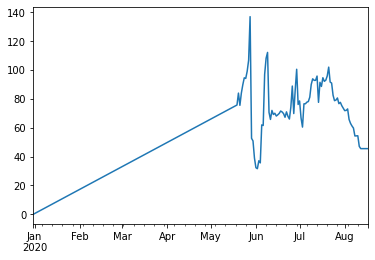

In [194]:
exogenas["tests_per_case_France"].plot()